## Process HAUCS DATA


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Subtitle

Look at this:

$$ y = \sum_{i = 0}^K{x^i} $$

In [14]:
df = pd.read_csv("2022-11-16-14-37-27.csv")

In [5]:
df.iloc[4]

time      2022-11-16 10:54:10
value0                0 23 88
value1               10 23 88
value2               22 23 88
value3               34 23 87
value4               46 23 87
value5               58 23 86
value6                    NaN
value7                    NaN
value8                    NaN
value9                    NaN
Name: 4, dtype: object

In [17]:
def decode_column(col):
    data = df.iloc[col]
    data = list(data)
    data = data[1:7]

    x = {"pres":[], "temp":[], "do":[]}
    for i in range(6):
        val = data[i]
        val = val.split()
        x["pres"].append(int(val[0]))
        x["temp"].append(int(val[1]))
        x["do"].append(int(val[2]))

    return x

x1 = decode_column(0)
x2 = decode_column(1)
x3 = decode_column(2)
x4 = decode_column(3)
x5 = decode_column(4)
x6 = decode_column(5)
x7 = decode_column(6)
x8 = decode_column(7)

time = np.linspace(0, 25, 6)
print(time)

[ 0.  5. 10. 15. 20. 25.]


In [7]:
x1["pres"]
for i in range(1, len(x2["pres"])):
  print(x2["pres"][i] - x2["pres"][i - 1])


6
12
12
12
12


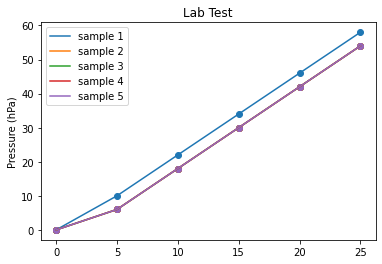

In [13]:
# plt.figure(figsize=(8, 10))
# plt.subplot(3,1,1)
plt.figure()
plt.title("Lab Test")
plt.ylabel("Pressure (hPa)")
plt.plot(time, x1["pres"])
plt.plot(time, x2["pres"])
plt.plot(time, x3["pres"])
plt.plot(time, x4["pres"])
plt.plot(time, x5["pres"])
plt.scatter(time, x1["pres"])
plt.scatter(time, x2["pres"])
plt.scatter(time, x3["pres"])
plt.scatter(time, x4["pres"])
plt.scatter(time, x5["pres"])
plt.legend(['sample 1', 'sample 2', 'sample 3', 'sample 4', 'sample 5'])
plt.savefig("pressure_test.jpg")
plt.show()
# plt.subplot(3,1,2)
# plt.ylabel("Temperature (C)")
# plt.plot(time, x1["temp"])
# plt.plot(time, x2["temp"])
# plt.scatter(time, x1["temp"])
# plt.scatter(time, x2["temp"])
# plt.subplot(3,1,3)
# plt.ylabel("Dissolved Oxygen (%)")
# plt.plot(time, x1["do"])
# plt.plot(time, x2["do"])
# plt.scatter(time, x1["do"])
# plt.scatter(time, x2["do"])
# plt.xlabel("Time (seconds)")
# plt.savefig("under_water.jpg")
# plt.show()

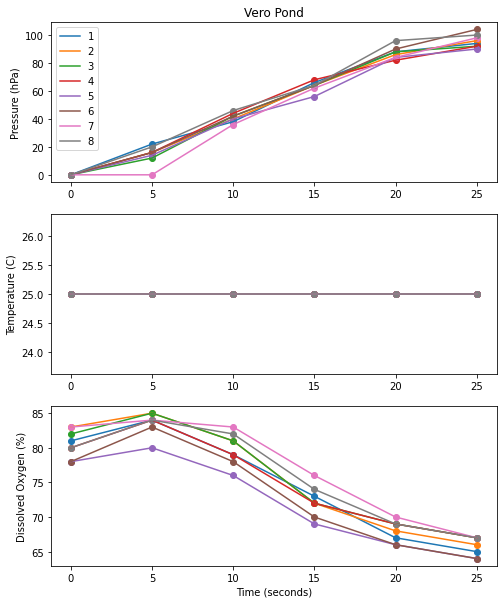

In [26]:
# plt.figure(figsize=(8, 10))
# plt.subplot(3,1,1)
data = [x1, x2, x3, x4, x5, x6, x7, x8]

plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.title("Vero Pond")
plt.legend(['1','2','3','4','5','6','7','8'])
plt.ylabel("Pressure (hPa)")
for i in data:
    plt.plot(time, i["pres"])
    plt.scatter(time, i["pres"])
plt.legend(['1','2','3','4','5','6','7','8'])
plt.subplot(3,1,2)
plt.ylabel("Temperature (C)")
for i in data:
    plt.plot(time, i["temp"])
    plt.scatter(time, i["temp"])
plt.subplot(3,1,3)
plt.ylabel("Dissolved Oxygen (%)")
for i in data:
    plt.plot(time, i["do"])
    plt.scatter(time, i["do"])
plt.xlabel("Time (seconds)")
plt.savefig("vero_farm.jpg")
plt.show()

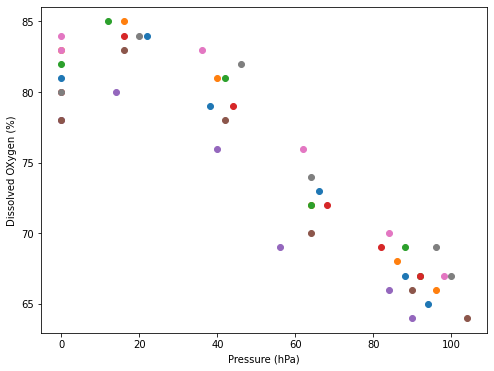

In [33]:
plt.figure(figsize=(8,6))
for i in data:
    plt.scatter(i["pres"], i["do"])
plt.xlabel("Pressure (hPa)")
plt.ylabel("Dissolved OXygen (%)")
plt.show()